# Proyecto de Identificación de Tapones

En este proyecto, vamos a identificar tapones en imágenes. 

Para cada tapón, se pintará un punto en el centro del mismo. 
Además, mostraremos el área del tapón al lado del punto, junto con el color del tapón.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [9]:
## EN PRIMER LUGAR importamos las imágenes a estudiar, comenzamos con la imagen
## del set de tapones 1.

image = cv2.imread('../imgs/tapones1.jpeg')
image_copy= image.copy()
## A continuación, convertimos la imagen a escala de grises.
gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
hsv = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV) 
thresh_imagen_gris = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)[1]

# Convertimos la imagen a HSV.
# Filtramos ahora por cantidades de Hue para filtrar colores.
hue = cv2.split(hsv)[0]
mask_hue = cv2.inRange(hue,0,15)

filtrado_ = cv2.bitwise_and(blurred, blurred, mask=mask_hue)
mean_c = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, -13)
gauss = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, -5)

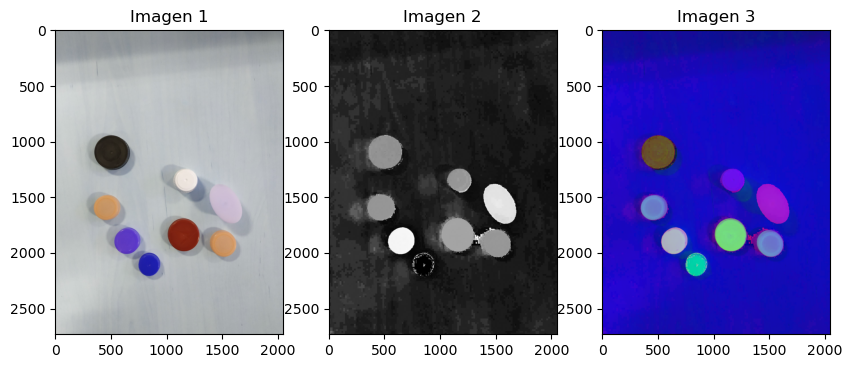

In [10]:

## Finalmente, mostramos las imágenes.

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

#axes[0].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
#axes[0].set_title("Imagen original")


axes[0].imshow(image)
axes[0].set_title("Imagen 1")

axes[1].imshow(hue, cmap='gray')
axes[1].set_title("Imagen 2")

axes[2].imshow(hsv)
axes[2].set_title("Imagen 3")
plt.show()